## Entropy from bond percolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import seaborn as sns

# Font

In [2]:

font_24 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 24,
        }

font_32 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 32,
        }

font_16 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

font_12 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 12,
        }

# Color

(0.5, 2)

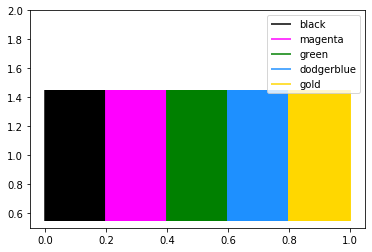

In [3]:
# digonto vai nature paper
colors = ['black', 'magenta', 'green', 'deepskyblue', 'orange']


colors = ['black', 'magenta', 'green', 'dodgerblue', 'gold']

# ok 1
# colors = ['black', 'purple', 'magenta', 'green', 'dodgerblue', 'orange', 'gold']

spikes = np.linspace(0, 1, 2000)
size=spikes.shape[0]//len(colors)

for a in range(len(colors)):
    plt.eventplot(spikes[a*size:(a+1)*size], orientation='horizontal', linelengths=0.9, color = colors[a], label=colors[a])
    pass
# plt.show()
plt.legend()
plt.ylim([0.5,2])

In [4]:

out_img_dir = "../figures/"
in_data_dir = "../data/bond-percolation/"

In [5]:
signature = 'sq_lattice_bond_percolation__periodic__'
files = glob.glob(in_data_dir + signature + '*')

# print("chosen signature")
print(signature)
print("files")


sq_lattice_bond_percolation__periodic__
files


In [6]:
# files = [files[2]]
files

['../data/bond-percolation/sq_lattice_bond_percolation__periodic__300_2018.8.2_4.39.43.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__300_2018.8.2_4.39.45.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__200_2018.8.2_1.47.42.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__250_2018.8.2_2.37.36.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__350_2018.8.2_12.28.10.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__250_2018.8.2_2.37.48.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__200_2018.8.2_1.47.38.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__400_2018.8.2_14.14.51.txt',
 '../data/bond-percolation/sq_lattice_bond_percolation__periodic__400_2018.8.2_15.48.8.txt']

In [7]:
length = np.arange(200, 450, 50)
# length = [400]
length

array([200, 250, 300, 350, 400])

In [8]:
data = dict()
ensemble = dict()
for L in length:
    data[L] = 0
    ensemble[L] = 0
    
for file in files:
    with open(file) as f:
        line = f.readline()
        print(line)
        if line[0] == '#':
            line = line[1:]
        js = json.loads(line)
        L = int(js['length'])
        ensmbl = js['ensemble_size']
        if L in length:
            ensemble[L] += int(ensmbl)
            pass
        pass
    if L in length:
#         p, H, P = np.loadtxt(file, usecols=(0,1,2), skiprows=1, unpack=True, delimiter=',')
#         data[L] += np.array([p, H, P])*ensmbl

        p, H = np.loadtxt(file, usecols=(0,1), skiprows=1, unpack=True)
        data[L] += np.array([p, H])*ensmbl
        pass
    pass

# normalizing
for L in length:
    data[L] /= ensemble[L]
    pass

{"length":300,"ensemble_size":1000,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":300,"ensemble_size":1000,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":200,"ensemble_size":1000,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":250,"ensemble_size":1000,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":350,"ensemble_size":1000,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":250,"ensemble_size":1000,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":200,"ensemble_size":1000,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":400,"ensemble_size":200,"signature":"sq_lattice_bond_percolation__periodic_"}

{"length":400,"ensemble_size":500,"signature":"sq_lattice_bond_percolation__periodic_"}



In [12]:
# n = 5
# palette = sns.cubehelix_palette(n_colors=n,start=1.2, light=0.85, dark=0.07, hue=1, gamma=0.95, rot=0.5)
# sns.palplot(palette)

In [20]:
# # my_cmap = ListedColormap(sns.color_palette("cubehelix", 8).as_hex())
# sns.set()
# sns.set_palette(palette)

# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# sns.set_style(styles[4])

In [9]:
colors.reverse()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_bond_percolation__periodic___entropy.eps


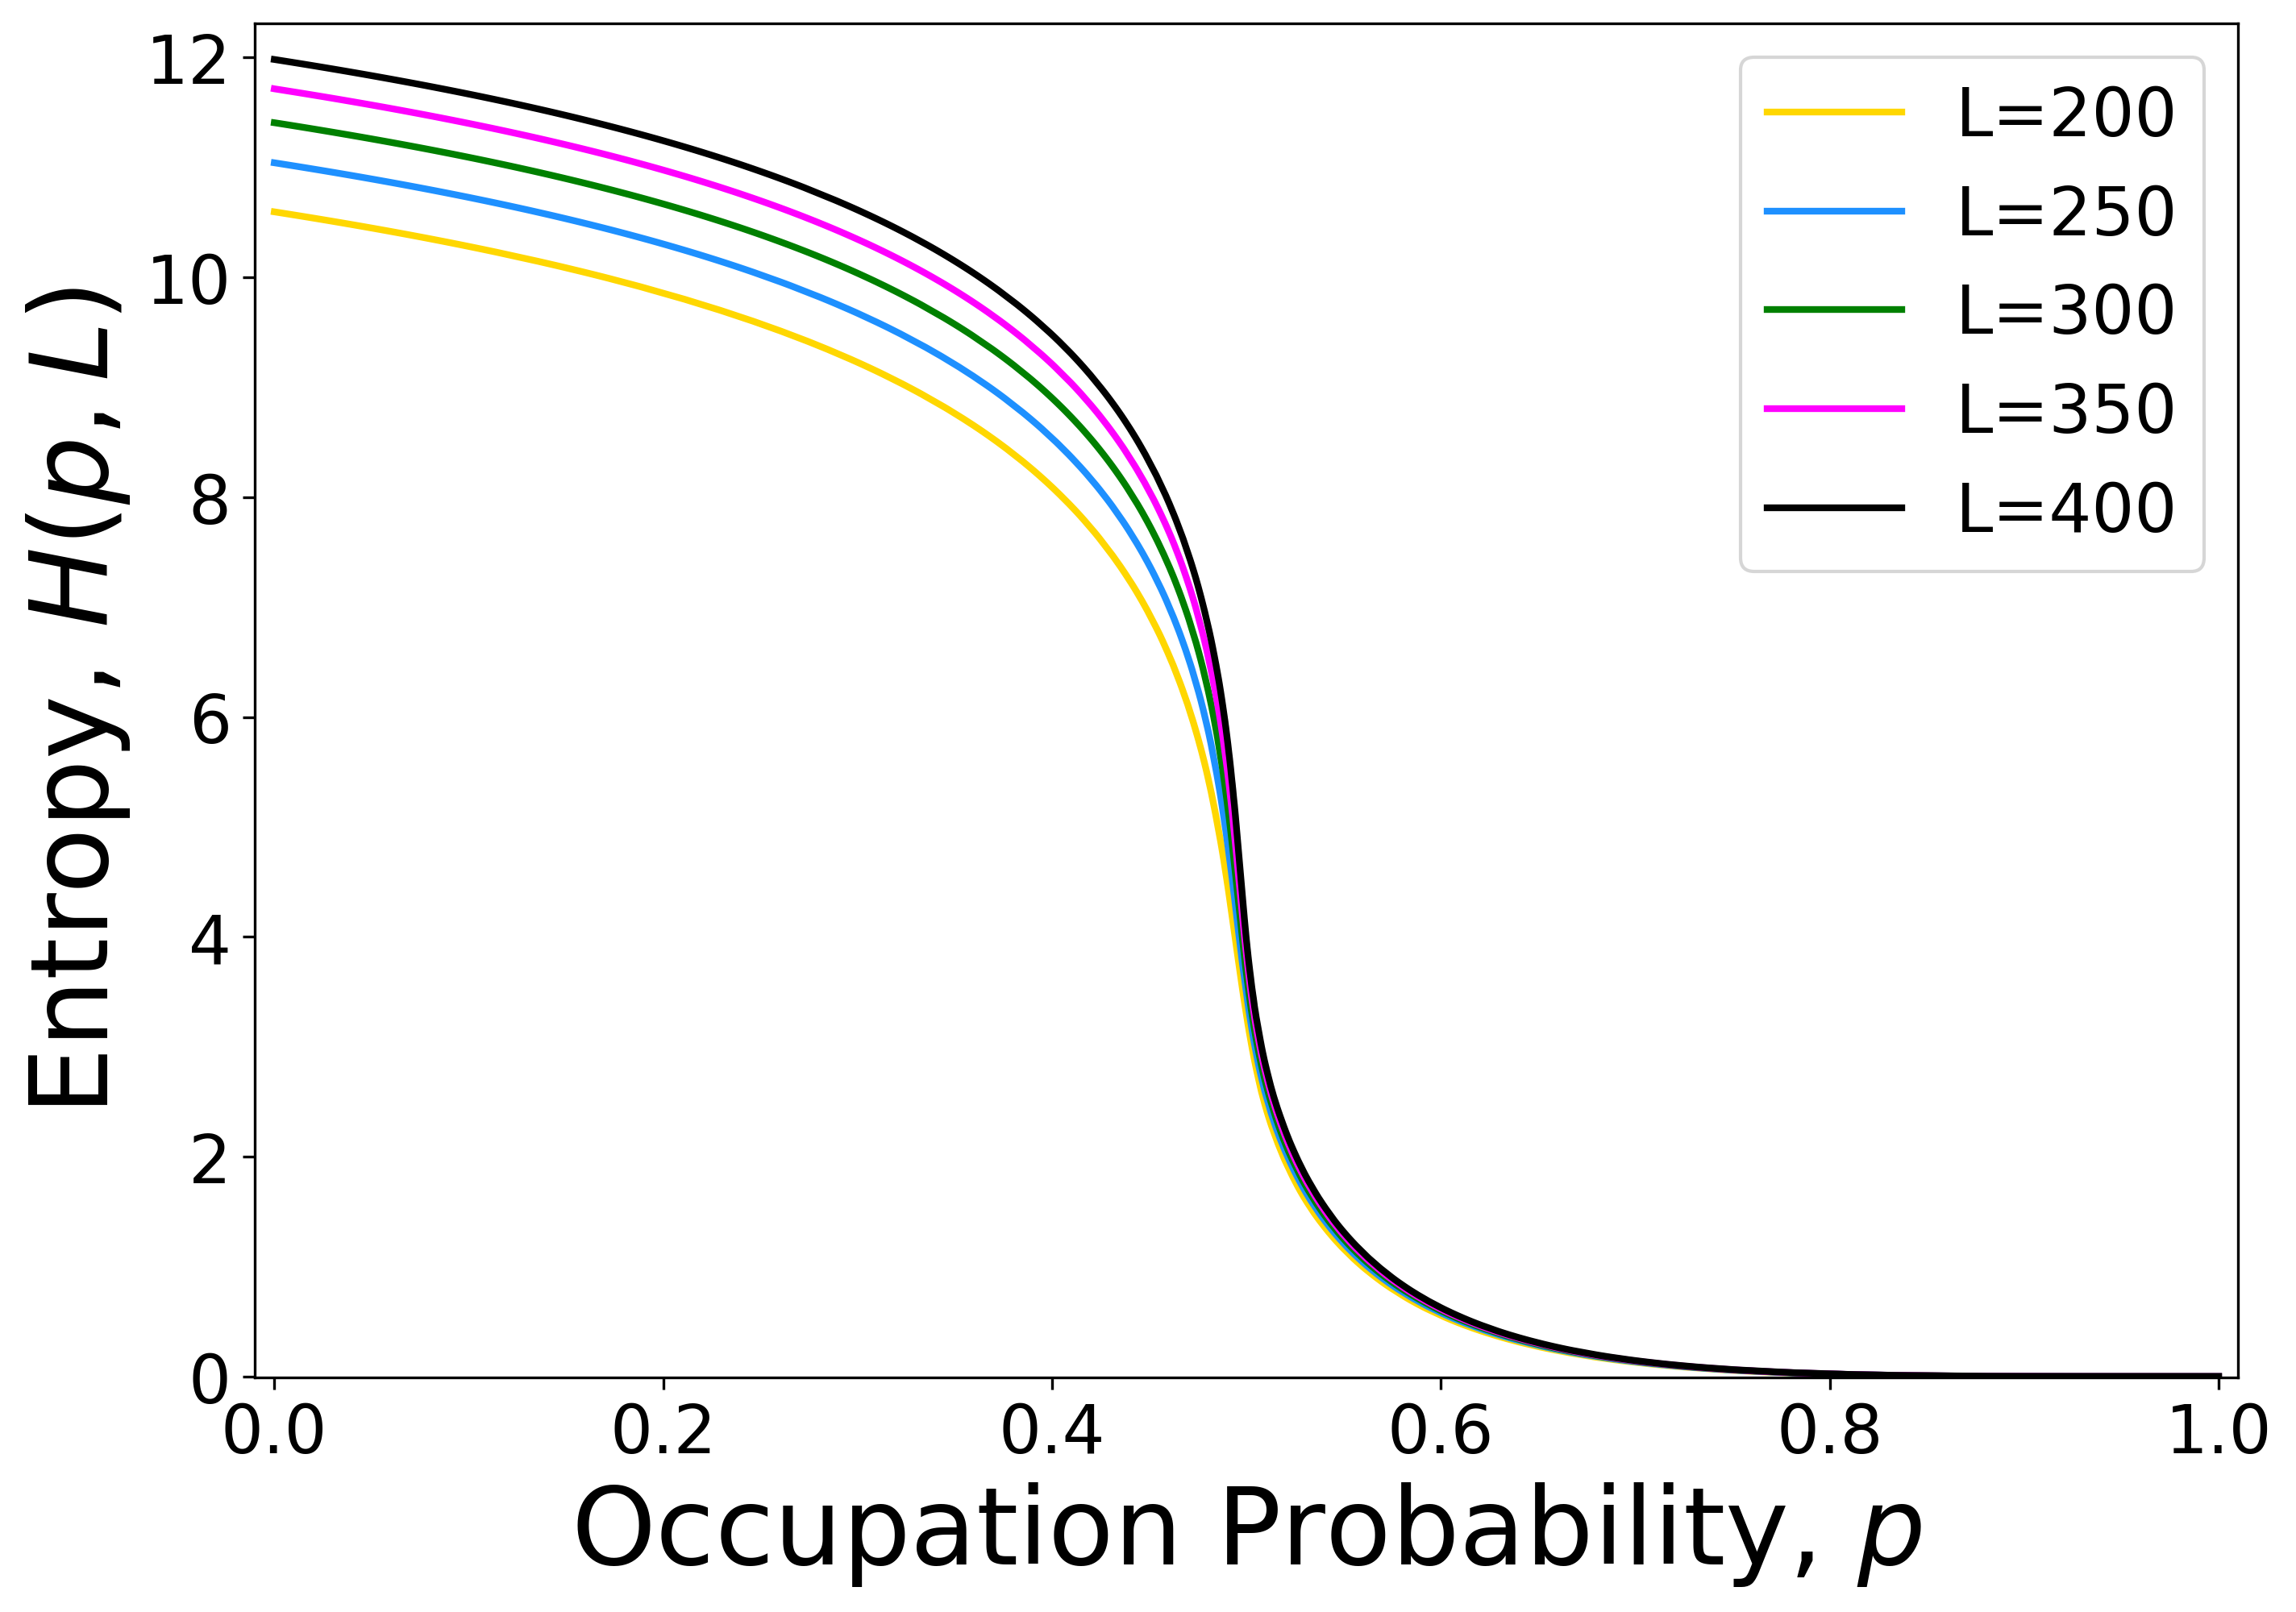

In [11]:
fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)
a = 0
for L in length:
    p, H = data[L]
    plt.plot(p, H, label='L={}'.format(L), color=colors[a], linewidth=2)
    a += 1
    
    pass
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 12.31)

ax.set_position([0.12, 0.14, 0.82, 0.8])
plt.legend(loc=0, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel(r'Occupation Probability, $p$', font_32)
plt.ylabel(r'Entropy, $H(p,L)$', font_32)

filename = out_img_dir + signature + '_entropy.eps'
plt.savefig(filename)
print(filename)

## Entropy - Order Parameter

In [14]:
# fig = plt.figure(figsize=(5,5), dpi=300)
# for L in length:
#     p, H, P = data[L]
#     plt.plot(p, H, label='Entropy')
#     plt.plot(p, P, label='Order Parameter')
    
#     pass
# plt.xlim(-0.01, 1.01)
# plt.ylim(-0.01, 12.31)
# plt.legend()
# plt.xlabel(r'Occupation Probability, $p$', font)
# plt.ylabel(r'Entropy, $H(p,L)$', font)
# fig.tight_layout(pad=0.7)
# # fig.tight_layout(h_pad=0.7, w_pad=0.7)
# filename = out_img_dir + signature + '_entropy.eps'
# # plt.savefig(filename)

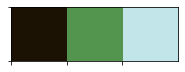

In [24]:
# n = 3
# palette = sns.cubehelix_palette(n_colors=n,start=1.2, light=0.85, dark=0.07, hue=1, gamma=0.95, rot=0.5, reverse=True)
# sns.palplot(palette)

In [25]:
# # my_cmap = ListedColormap(sns.color_palette("cubehelix", 8).as_hex())
# sns.set()
# sns.set_palette(palette)

# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# sns.set_style(styles[4])

In [12]:
filename = "../data/bond-percolation/order-disorder/sq_lattice_bond_percolation__periodic__L400_2019-01-01_134509.csv"

p, H, P = np.loadtxt(filename, usecols=(0,1,2), unpack=True, delimiter=',')

P /= 2*400**2
H /= np.max(H)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_bond_percolation__periodic_entropy-order-parameter.eps


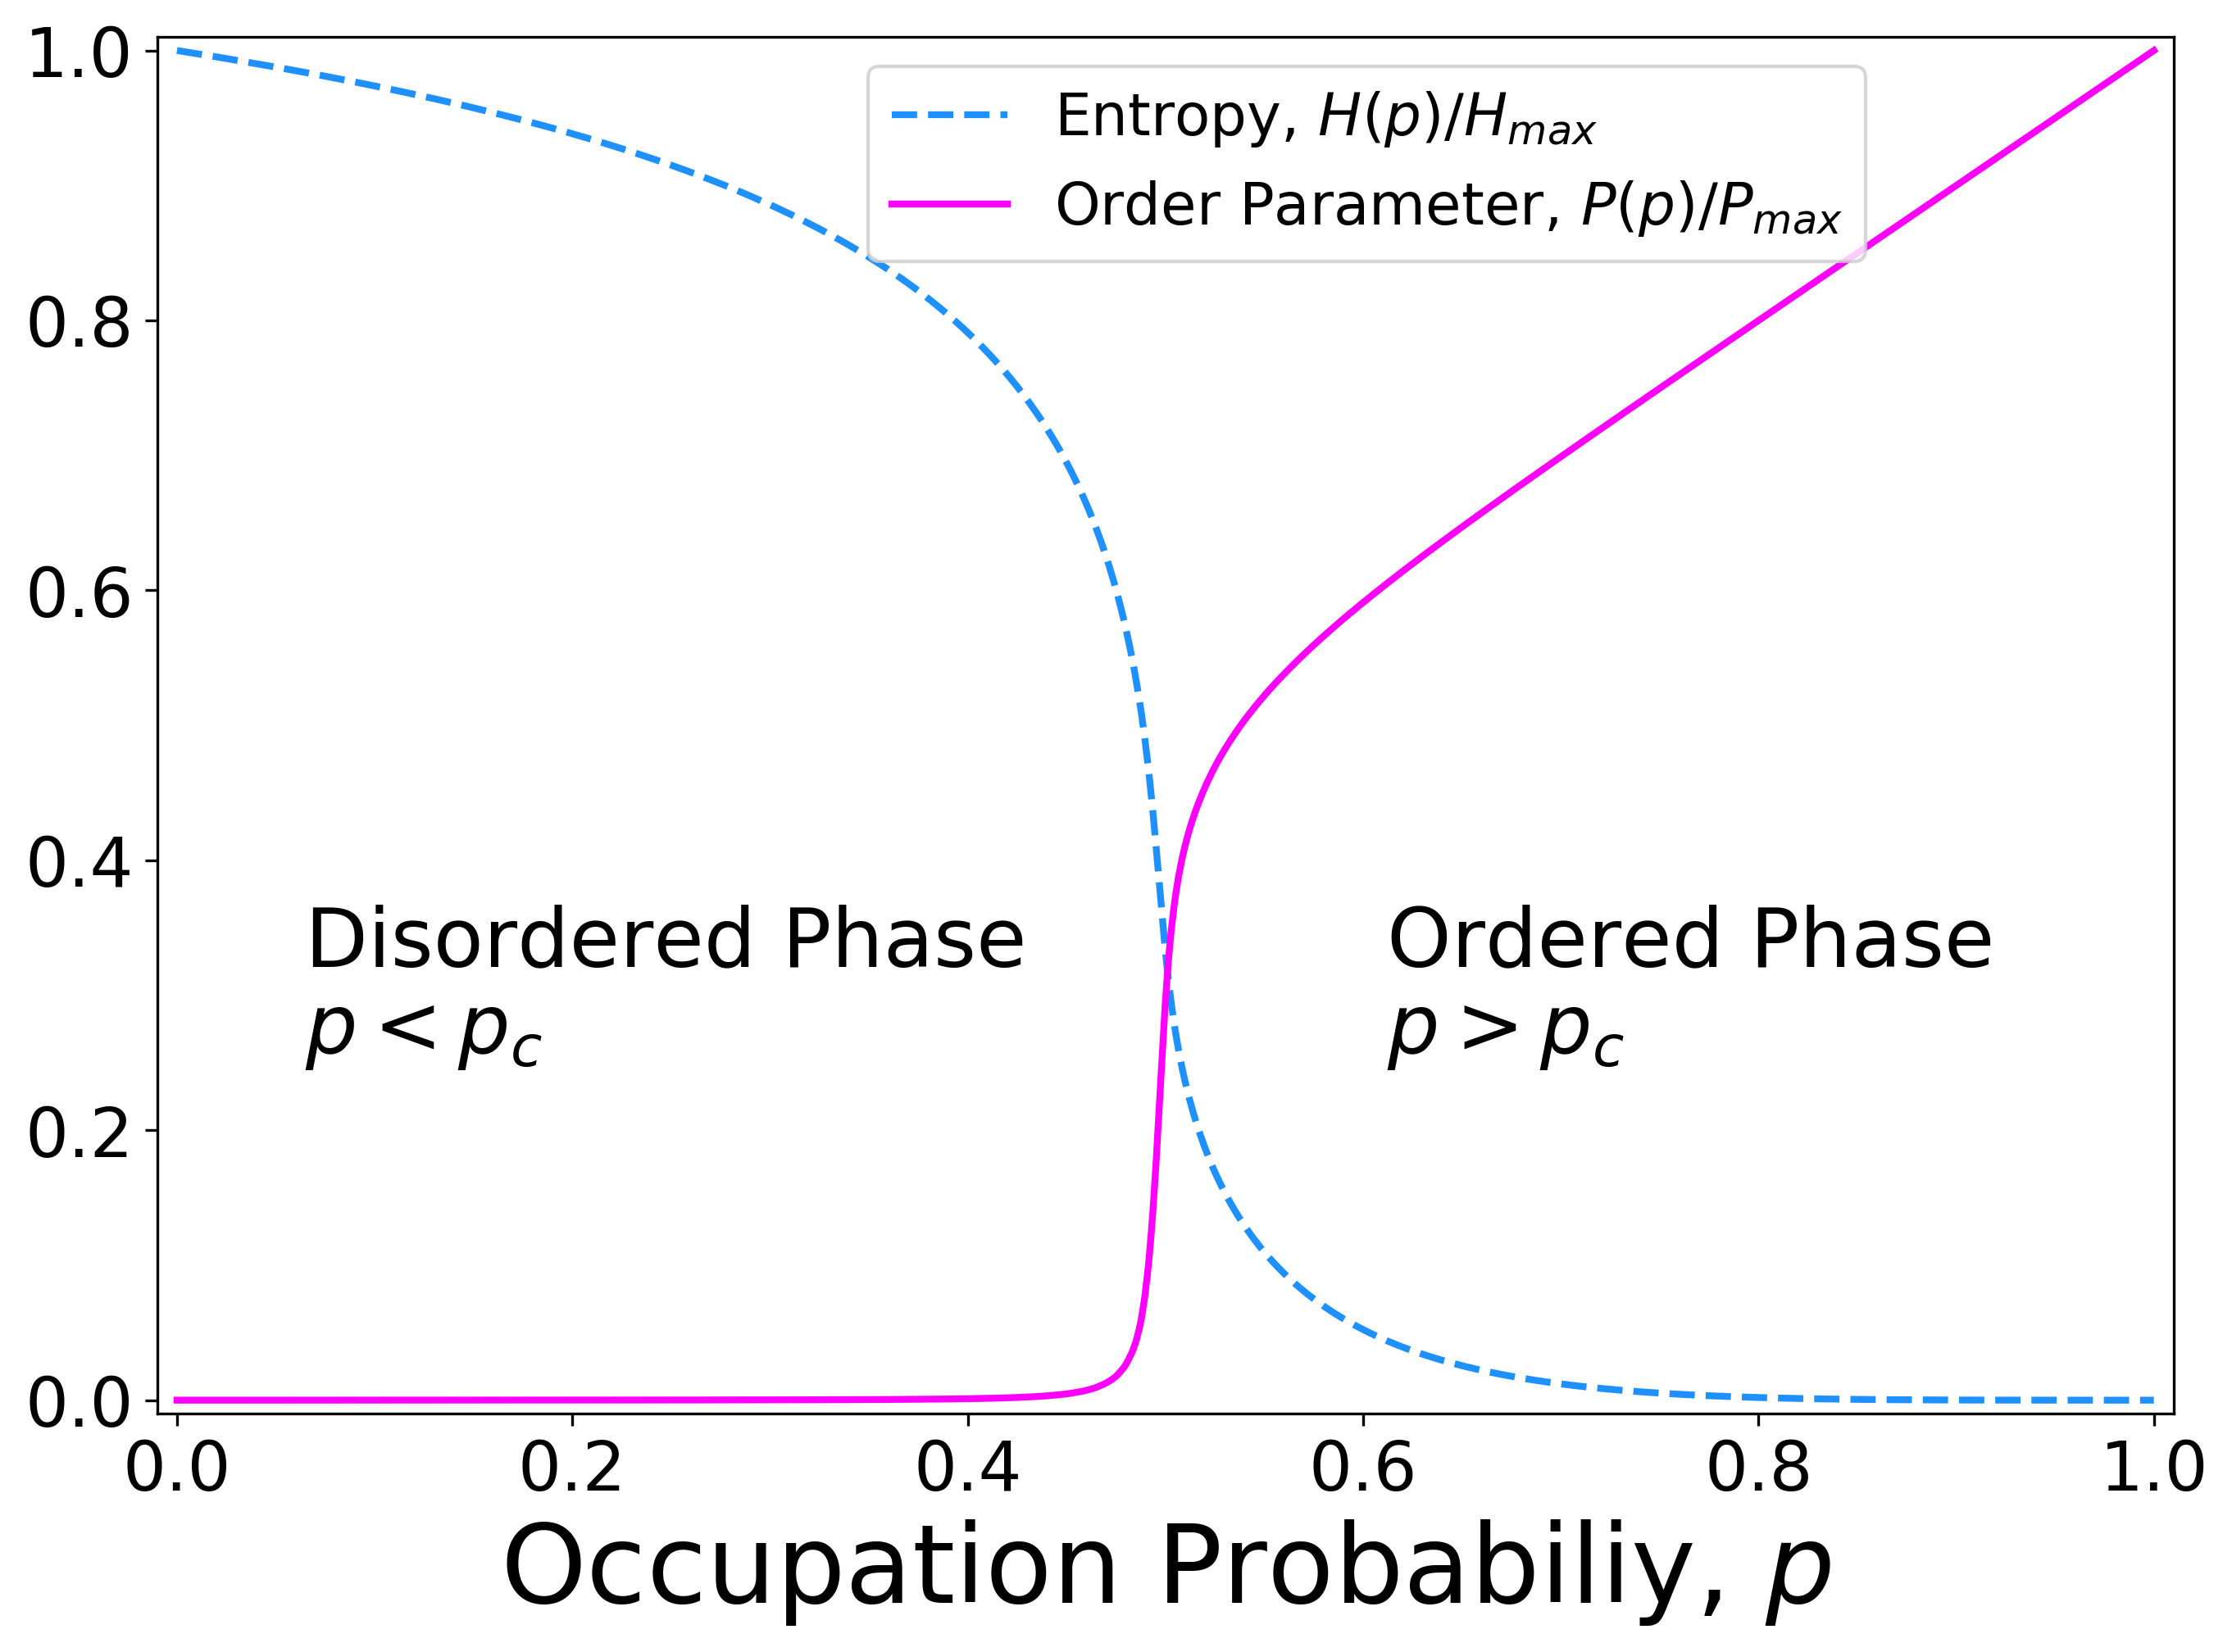

In [23]:

fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)

indices = np.linspace(0, p.shape[0]-1, 2000, dtype=int)

ax.plot(p[indices], H[indices], '--', label=r'Entropy, $H(p)/H_{max}$', color=colors[1], linewidth=2)
ax.plot(p[indices], P[indices], label=r'Order Parameter, $P(p)/P_{max}$', color=colors[-2], linewidth=2)


ax.set_position([0.12, 0.14, 0.82, 0.8])

plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc=9, fontsize=17, bbox_to_anchor=(0.5, 0.5, 0.2, 0.5))

# leg = plt.legend(loc=2, fancybox=True)
# leg.get_frame().set_alpha(0.5)

plt.xlabel(r"Occupation Probabiliy, $p$", font_32)
# plt.ylabel(r"$H/H_{max}$,$P/P_{max}$", font_16)

plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

fig.text(0.18, 0.4, "Disordered Phase", font_24)
fig.text(0.18, 0.35, r"$p < p_c$", font_24)

fig.text(0.62, 0.4, "Ordered Phase", font_24)
fig.text(0.62, 0.35, r"$p > p_c$", font_24)


# plt.show()
out_file = out_img_dir + "sq_lattice_bond_percolation__periodic_entropy-order-parameter.eps"
plt.savefig(out_file)
print(out_file)